In [167]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [168]:
np.random.seed(1)
n_points = 500
y = np.concatenate((np.zeros(n_points),np.ones(n_points),np.ones(n_points)*2,np.ones(n_points)*3,np.ones(n_points)*4,
                    np.ones(n_points)*5,np.ones(n_points)*6,np.ones(n_points)*7,np.ones(n_points)*8,np.ones(n_points)*9))
#y = np.random.randint(0,3,6000)
idx= []
for i in range(10):
    print(i,sum(y==i))
    idx.append(y==i)

0 500
1 500
2 500
3 500
4 500
5 500
6 500
7 500
8 500
9 500


In [169]:
x = np.zeros((n_points*10,5))

In [170]:
np.random.seed(1)
cov_mat = [[0.0002,0,0,0,0],[0,0.0002,0,0,0],[0,0,0.0002,0,0],
                                                 [0,0,0,0.0002,0],[0,0,0,0,0.0002]]

x[idx[0],:] = np.random.multivariate_normal(mean = [1,0,0,0,0],
                                            cov=cov_mat,size=sum(idx[0]))


x[idx[1],:] = np.random.multivariate_normal(mean = [0,1,0,0,0],
                                            cov=cov_mat,size=sum(idx[1]))


x[idx[2],:] = np.random.multivariate_normal(mean = [0,0,1,0,0],
                                            cov=cov_mat,size=sum(idx[2]))


x[idx[3],:] = np.random.multivariate_normal(mean = [0,0,0,-0.75,0.5],
                                            cov=cov_mat,size=sum(idx[3]))



x[idx[4],:] = np.random.multivariate_normal(mean = [0,0,0,0.65,-0.65],
                                            cov=cov_mat,size=sum(idx[4]))


x[idx[5],:] = np.random.multivariate_normal(mean = [0,0,0,-0.9,-0.75],
                                            cov=cov_mat,size=sum(idx[5]))


x[idx[6],:] = np.random.multivariate_normal(mean = [0,0,0,0.8,-0.8],
                                            cov=cov_mat,size=sum(idx[6]))

x[idx[7],:] = np.random.multivariate_normal(mean = [0,0,0,-0.5,0.8],
                                            cov=cov_mat,size=sum(idx[7]))


x[idx[8],:] = np.random.multivariate_normal(mean = [0,0,0,0.9,0.75],
                                            cov=cov_mat,size=sum(idx[8]))


x[idx[9],:] = np.random.multivariate_normal(mean = [0,0,0,-1,0.65],
                                            cov=cov_mat,size=sum(idx[9]))




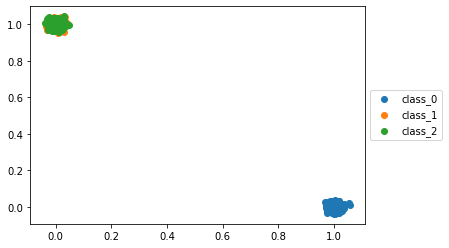

In [171]:
plt.scatter(x[idx[0],0],x[idx[0],1],label="class_"+str(0))

plt.scatter(x[idx[1],0],x[idx[1],1],label="class_"+str(1))



plt.scatter(x[idx[2],1],x[idx[2],2],label="class_"+str(2))


# plt.scatter(x[idx[3],3],x[idx[3],4],label="class_"+str(3))



# plt.scatter(x[idx[4],3],x[idx[4],4],label="class_"+str(4))


# plt.scatter(x[idx[5],3],x[idx[5],4],label="class_"+str(5))


# plt.scatter(x[idx[6],3],x[idx[6],4],label="class_"+str(6))


# plt.scatter(x[idx[7],3],x[idx[7],4],label="class_"+str(7))


# plt.scatter(x[idx[8],3],x[idx[8],4],label="class_"+str(8))


# plt.scatter(x[idx[9],3],x[idx[9],4],label="class_"+str(9))

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [172]:
mean_x = np.mean(x,axis=0,keepdims=True)
std_x = np.std(x,axis=0,keepdims=True)
x = ( x -  mean_x ) / std_x

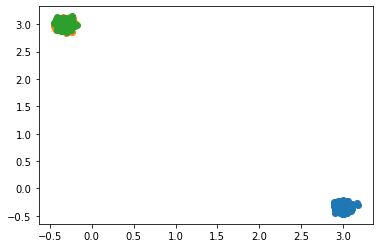

In [173]:
plt.scatter(x[idx[0],0],x[idx[0],1],label="class_"+str(0))

plt.scatter(x[idx[1],0],x[idx[1],1],label="class_"+str(1))

plt.scatter(x[idx[2],1],x[idx[2],2],label="class_"+str(2))


# plt.scatter(x[idx[3],3],x[idx[3],4],label="class_"+str(3))



# plt.scatter(x[idx[4],3],x[idx[4],4],label="class_"+str(4))


# plt.scatter(x[idx[5],3],x[idx[5],4],label="class_"+str(5))


# plt.scatter(x[idx[6],3],x[idx[6],4],label="class_"+str(6))


# plt.scatter(x[idx[7],3],x[idx[7],4],label="class_"+str(7))


# plt.scatter(x[idx[8],3],x[idx[8],4],label="class_"+str(8))


# plt.scatter(x[idx[9],3],x[idx[9],4],label="class_"+str(9))


# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [174]:
print(np.mean(x)),print(np.std(x))

3.490185918053612e-16
0.9999999999999997


(None, None)

In [175]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        self.fc1 = nn.Linear(5,1, bias=False)
        torch.nn.init.xavier_normal_(self.fc1.weight)

    def forward(self,z):
        out = self.helper(z)
        return out[:,0]
  
    
    def helper(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        return x

In [176]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(5,3, bias=True)
        torch.nn.init.xavier_normal_(self.fc1.weight)
        torch.nn.init.zeros_(self.fc1.bias)

    def forward(self,z):
        out = self.helper(z)
        return out
    def helper(self, x):
        x = self.fc1(x)
        return x

# fg vs bg

In [177]:
y_labels = np.zeros(y.shape)
y_labels[idx[0]] = 1
y_labels[idx[1]] = 1
y_labels[idx[2]] = 1

In [178]:
class SyntheticDataset(Dataset):
  """SyntheticDataset dataset."""

  def __init__(self, data,labels):
    self.data = data
    self.labels = labels

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx):
    return self.data[idx] , self.labels[idx]

In [179]:
batch  = 250
ds = SyntheticDataset(x,y_labels)
train_loader =  DataLoader( ds,batch_size= batch ,shuffle=True)


In [180]:
torch.manual_seed(12)
net1 = Net1().double()


In [181]:
criterion = nn.BCELoss()
optimizer = optim.Adam(net1.parameters(), lr=0.001,weight_decay=1e-5) #, momentum=0.9)

In [182]:
nos_epochs = 200
epoch_loss = []
for epoch in range(nos_epochs):  # loop over the dataset multiple times
    cnt = 0 
    running_loss = 0.0

    correct = 0
    total = 0 
    #training data set
    for i, data in  enumerate(train_loader):
        inputs , labels = data
        batch = inputs.size(0)
        #inputs, labels = inputs.to("cuda"), labels.to("cuda")
        inputs = inputs.double()
        # zero the parameter gradients
    
        optimizer.zero_grad()
        outputs = net1(inputs)
        
        
        prediction = outputs>0.5
        
        #print(labels,prediction.numpy().astype(int),prediction==labels)
        
        
        correct += torch.sum(prediction == labels)
        total += len(labels)
        
        
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        mini = 20
        if cnt % mini == mini-1:    # print every 40 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
            epoch_loss.append(running_loss/mini)
            running_loss = 0.0
        cnt=cnt+1
        
    print("Accuracy: ",correct.item(),total,correct.item()/total)
    if(np.mean(epoch_loss) <= 0.001):
        break;
    
print('Finished Training')


[1,    20] loss: 0.545
Accuracy:  2296 5000 0.4592
[2,    20] loss: 0.529
Accuracy:  2521 5000 0.5042
[3,    20] loss: 0.515
Accuracy:  2778 5000 0.5556
[4,    20] loss: 0.500
Accuracy:  3142 5000 0.6284
[5,    20] loss: 0.487
Accuracy:  3490 5000 0.698
[6,    20] loss: 0.474
Accuracy:  3773 5000 0.7546
[7,    20] loss: 0.461
Accuracy:  3965 5000 0.793
[8,    20] loss: 0.449
Accuracy:  4113 5000 0.8226
[9,    20] loss: 0.438
Accuracy:  4275 5000 0.855
[10,    20] loss: 0.427
Accuracy:  4494 5000 0.8988
[11,    20] loss: 0.416
Accuracy:  4629 5000 0.9258
[12,    20] loss: 0.406
Accuracy:  4734 5000 0.9468
[13,    20] loss: 0.396
Accuracy:  4786 5000 0.9572
[14,    20] loss: 0.387
Accuracy:  4864 5000 0.9728
[15,    20] loss: 0.378
Accuracy:  4912 5000 0.9824
[16,    20] loss: 0.369
Accuracy:  4946 5000 0.9892
[17,    20] loss: 0.361
Accuracy:  4972 5000 0.9944
[18,    20] loss: 0.353
Accuracy:  4985 5000 0.997
[19,    20] loss: 0.345
Accuracy:  4993 5000 0.9986
[20,    20] loss: 0.338
A

[171,    20] loss: 0.051
Accuracy:  5000 5000 1.0
[172,    20] loss: 0.050
Accuracy:  5000 5000 1.0
[173,    20] loss: 0.050
Accuracy:  5000 5000 1.0
[174,    20] loss: 0.049
Accuracy:  5000 5000 1.0
[175,    20] loss: 0.049
Accuracy:  5000 5000 1.0
[176,    20] loss: 0.048
Accuracy:  5000 5000 1.0
[177,    20] loss: 0.048
Accuracy:  5000 5000 1.0
[178,    20] loss: 0.047
Accuracy:  5000 5000 1.0
[179,    20] loss: 0.047
Accuracy:  5000 5000 1.0
[180,    20] loss: 0.047
Accuracy:  5000 5000 1.0
[181,    20] loss: 0.046
Accuracy:  5000 5000 1.0
[182,    20] loss: 0.046
Accuracy:  5000 5000 1.0
[183,    20] loss: 0.045
Accuracy:  5000 5000 1.0
[184,    20] loss: 0.045
Accuracy:  5000 5000 1.0
[185,    20] loss: 0.044
Accuracy:  5000 5000 1.0
[186,    20] loss: 0.044
Accuracy:  5000 5000 1.0
[187,    20] loss: 0.044
Accuracy:  5000 5000 1.0
[188,    20] loss: 0.043
Accuracy:  5000 5000 1.0
[189,    20] loss: 0.043
Accuracy:  5000 5000 1.0
[190,    20] loss: 0.042
Accuracy:  5000 5000 1.0


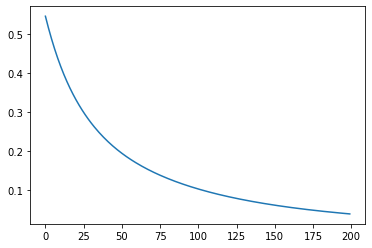

In [183]:
plt.plot(epoch_loss)


# fg1 vs fg2 vs fg3

In [184]:
x_data = x[:1500]
y_data = y[:1500]

In [185]:
batch  = 250
ds1 = SyntheticDataset(x_data,y_data)
train_loader1 =  DataLoader( ds1,batch_size= batch ,shuffle=True)

In [186]:
torch.manual_seed(12)
net2 = Net2().double()


In [187]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net2.parameters(), lr=0.007,weight_decay=1e-5 ) #, momentum=0.9)

In [188]:
nos_epochs = 200
epoch_loss = []
for epoch in range(nos_epochs):  # loop over the dataset multiple times
    cnt = 0 
    running_loss = 0.0

    correct = 0
    total = 0 
    #training data set
    for i, data in  enumerate(train_loader1):
        inputs , labels = data
        batch = inputs.size(0)
        #inputs, labels = inputs.to("cuda"), labels.to("cuda")
        inputs = inputs.double()
        labels = labels.long()
        # zero the parameter gradients
    
        optimizer.zero_grad()
        outputs = net2(inputs)
        
        
        #prediction = outputs>0.5
        _, prediction = torch.max(outputs.data, 1)
        
        
        correct += torch.sum(prediction == labels)
        total += len(labels)
        
        
        
        loss = criterion(outputs, labels) 
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        mini = 6
        if cnt % mini == mini-1:    # print every 40 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
            epoch_loss.append(running_loss/mini)
            running_loss = 0.0
        cnt=cnt+1
        
    print("Accuracy: ",correct.item(),total,correct.item()/total)
    if(np.mean(epoch_loss) <= 0.001):
        break;
    
print('Finished Training')


[1,     6] loss: 3.046
Accuracy:  209 1500 0.13933333333333334
[2,     6] loss: 2.802
Accuracy:  499 1500 0.33266666666666667
[3,     6] loss: 2.569
Accuracy:  500 1500 0.3333333333333333
[4,     6] loss: 2.347
Accuracy:  500 1500 0.3333333333333333
[5,     6] loss: 2.136
Accuracy:  500 1500 0.3333333333333333
[6,     6] loss: 1.932
Accuracy:  500 1500 0.3333333333333333
[7,     6] loss: 1.739
Accuracy:  500 1500 0.3333333333333333
[8,     6] loss: 1.555
Accuracy:  500 1500 0.3333333333333333
[9,     6] loss: 1.381
Accuracy:  500 1500 0.3333333333333333
[10,     6] loss: 1.219
Accuracy:  500 1500 0.3333333333333333
[11,     6] loss: 1.067
Accuracy:  500 1500 0.3333333333333333
[12,     6] loss: 0.931
Accuracy:  500 1500 0.3333333333333333
[13,     6] loss: 0.809
Accuracy:  500 1500 0.3333333333333333
[14,     6] loss: 0.702
Accuracy:  500 1500 0.3333333333333333
[15,     6] loss: 0.606
Accuracy:  812 1500 0.5413333333333333
[16,     6] loss: 0.527
Accuracy:  1491 1500 0.994
[17,     6]

[166,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[167,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[168,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[169,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[170,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[171,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[172,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[173,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[174,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[175,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[176,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[177,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[178,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[179,     6] loss: 0.006
Accuracy:  1500 1500 1.0
[180,     6] loss: 0.005
Accuracy:  1500 1500 1.0
[181,     6] loss: 0.005
Accuracy:  1500 1500 1.0
[182,     6] loss: 0.005
Accuracy:  1500 1500 1.0
[183,     6] loss: 0.005
Accuracy:  1500 1500 1.0
[184,     6] loss: 0.005
Accuracy:  1500 1500 1.0
[185,     6] loss: 0.005
Accuracy:  1500 1500 1.0


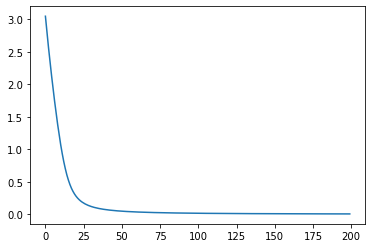

In [189]:
plt.plot(epoch_loss)


# mosaic data training

In [190]:
foreground_classes = {'class_0','class_1' }

background_classes = {'bg_classes',}

In [191]:
desired_num = 1100  # 100 + 1000


m = 100



mosaic_list_of_images =[]
mosaic_label = []
fore_idx=[]
for j in tqdm(range(desired_num)):
    np.random.seed(j)
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,m)
    a = []
    for i in range(m):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list_of_images.append(np.reshape(a,(m,5)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

100%|██████████████████████████████████████| 1100/1100 [00:02<00:00, 392.67it/s]


In [192]:
len(mosaic_list_of_images),mosaic_list_of_images[0].shape

(1100, (100, 5))

In [193]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list_of_images, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list_of_images
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

In [194]:
batch = 250
msd1 = MosaicDataset(mosaic_list_of_images[0:100], mosaic_label[0:100] , fore_idx[0:100])
train_loader = DataLoader( msd1 ,batch_size= batch ,shuffle=True) 


batch = 250
msd2 = MosaicDataset(mosaic_list_of_images[100:], mosaic_label[100:] , fore_idx[100:])
test_loader = DataLoader( msd2 ,batch_size= batch ,shuffle=False)

In [195]:
class Focus(nn.Module):
    def __init__(self):
        super(Focus, self).__init__()
        self.fc1 = nn.Linear(5,1, bias=False)
        torch.nn.init.zeros_(self.fc1.weight)
        #self.fc2 = nn.Linear(50, 1, bias=False)
        #torch.nn.init.xavier_normal_(self.fc2.weight)

    def forward(self,z):
        #print("data",z)
        batch = z.size(0)
        patches = z.size(1)
        z = z.view(batch,patches,5*1)
        alp1,ft1 = self.helper(z)
        
  
        alpha = F.softmax(alp1,dim=1)
        y = torch.sum(alpha*ft1,dim=1)
        #print(alpha.shape,y.shape)
        alpha =alpha[:,:,0]

        return alpha,y   # return  alpha values,attended data
  
    
    def helper(self, x):
      x1 = x
      x = self.fc1(x)

      return x,x1

In [196]:
class Classification(nn.Module):
  def __init__(self):
    super(Classification, self).__init__()
    self.fc1 = nn.Linear(5, 3)
#     self.fc2 = nn.Linear(50,3)
    torch.nn.init.xavier_normal_(self.fc1.weight)
    torch.nn.init.zeros_(self.fc1.bias)


    #torch.nn.init.xavier_normal_(self.fc2.weight)
    #torch.nn.init.zeros_(self.fc2.bias)

  def forward(self, x):
    #print(x.shape)
    #x = x.view(-1, 1)
    #print(x.shape)
    #x = F.relu(self.fc1(x))
    x = self.fc1(x)
    # print(x.shape)
    return x

In [197]:
torch.manual_seed(14)
focus_net = Focus().double()
#focus_net = focus_net.to("cuda")

In [198]:
torch.manual_seed(14)
classify = Classification().double()
#classify = classify.to("cuda")

In [199]:
criterion = nn.CrossEntropyLoss()
optimizer_classify = optim.Adam(classify.parameters(), lr=0.3 ) #, momentum=0.9)
optimizer_focus = optim.Adam(focus_net.parameters(), lr=0.3 ) #, momentum=0.9)


In [200]:
col1=[]
col2=[]
col3=[]
col4=[]
col5=[]
col6=[]
col7=[]
col8=[]
col9=[]
col10=[]
col11=[]
col12=[]
col13=[]

In [201]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in train_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)
    # print(outputs.shape)
    _, predicted = torch.max(outputs.data, 1)
    # print(predicted.shape)

    for j in range(labels.size(0)):
      count += 1
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      # print(focus, fore_idx[j], predicted[j])
      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %f %%' % ( 100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %f %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %f %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %f %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %f %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half ==================> ",argmax_more_than_half)
print("argmax_less_than_half ==================> ",argmax_less_than_half)
print(count)

print("="*100)

col1.append(0)
col2.append(argmax_more_than_half)
col3.append(argmax_less_than_half)
col4.append(focus_true_pred_true)
col5.append(focus_false_pred_true)
col6.append(focus_true_pred_false)
col7.append(focus_false_pred_false)

Accuracy of the network on the train images: 39.000000 %
total correct 39
total train set images 100
focus_true_pred_true 0 =============> FTPT : 0.000000 %
focus_false_pred_true 39 =============> FFPT : 39.000000 %
focus_true_pred_false 0 =============> FTPF : 0.000000 %
focus_false_pred_false 61 =============> FFPF : 61.000000 %
argmax_more_than_half ==================>  0
argmax_less_than_half ==================>  100
100


In [202]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %f %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %f %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %f %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %f %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half ==================> ",argmax_more_than_half)
print("argmax_less_than_half ==================> ",argmax_less_than_half)
col8.append(argmax_more_than_half)
col9.append(argmax_less_than_half)
col10.append(focus_true_pred_true)
col11.append(focus_false_pred_true)
col12.append(focus_true_pred_false)
col13.append(focus_false_pred_false)

Accuracy of the network on the test images: 32.000000 %
total correct 320
total train set images 1000
focus_true_pred_true 3 =============> FTPT : 0.300000 %
focus_false_pred_true 317 =============> FFPT : 31.700000 %
focus_true_pred_false 10 =============> FTPF : 1.000000 %
focus_false_pred_false 670 =============> FFPF : 67.000000 %
argmax_more_than_half ==================>  0
argmax_less_than_half ==================>  1000


In [203]:
nos_epochs = 500
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0


for epoch in range(nos_epochs):  # loop over the dataset multiple times

  focus_true_pred_true =0
  focus_false_pred_true =0
  focus_true_pred_false =0
  focus_false_pred_false =0
  
  argmax_more_than_half = 0
  argmax_less_than_half =0
  
  running_loss = 0.0
  epoch_loss = []
  cnt=0

  iteration = desired_num // batch
  
  #training data set
  
  for i, data in  enumerate(train_loader):
    inputs , labels , fore_idx = data
    batch = inputs.size(0)
    #inputs, labels = inputs.to("cuda"), labels.to("cuda")
    inputs = inputs.double()
    # zero the parameter gradients
    
    optimizer_focus.zero_grad()
    optimizer_classify.zero_grad()
    
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)
#     print(outputs)
#     print(outputs.shape,labels.shape , torch.argmax(outputs, dim=1))

    loss = criterion(outputs, labels) 
    loss.backward()
    optimizer_focus.step()
    optimizer_classify.step()

    running_loss += loss.item()
    mini = 1
    if cnt % mini == mini-1:    # print every 40 mini-batches
      print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / mini))
      epoch_loss.append(running_loss/mini)
      running_loss = 0.0
    cnt=cnt+1
    
    if epoch % 1 == 0:
      for j in range (batch):
        focus = torch.argmax(alphas[j])

        if(alphas[j][focus] >= 0.5):
          argmax_more_than_half +=1
        else:
          argmax_less_than_half +=1

        if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1

        elif(focus != fore_idx[j] and predicted[j] == labels[j]):
          focus_false_pred_true +=1

        elif(focus == fore_idx[j] and predicted[j] != labels[j]):
          focus_true_pred_false +=1

        elif(focus != fore_idx[j] and predicted[j] != labels[j]):
          focus_false_pred_false +=1

  if(np.mean(epoch_loss) <= 0.001):
      break;

  if epoch % 1 == 0:
    col1.append(epoch + 1)
    col2.append(argmax_more_than_half)
    col3.append(argmax_less_than_half)
    col4.append(focus_true_pred_true)
    col5.append(focus_false_pred_true)
    col6.append(focus_true_pred_false)
    col7.append(focus_false_pred_false)
    # print("="*20)
    # print("Train FTPT : ", col4)
    # print("Train FFPT : ", col5)
    #************************************************************************
    #testing data set  
    # focus_net.eval()
    with torch.no_grad():
      focus_true_pred_true =0
      focus_false_pred_true =0
      focus_true_pred_false =0
      focus_false_pred_false =0

      argmax_more_than_half = 0
      argmax_less_than_half =0
      for data in test_loader:
        inputs, labels , fore_idx = data
        batch = inputs.size(0)
        inputs = inputs.double()
        #inputs, labels = inputs.to("cuda"), labels.to("cuda")
        alphas, avg_images = focus_net(inputs)
        outputs = classify(avg_images)
        _, predicted = torch.max(outputs.data, 1)

        for j in range (batch):
          focus = torch.argmax(alphas[j])

          if(alphas[j][focus] >= 0.5):
            argmax_more_than_half +=1
          else:
            argmax_less_than_half +=1

          if(focus == fore_idx[j] and predicted[j] == labels[j]):
            focus_true_pred_true += 1

          elif(focus != fore_idx[j] and predicted[j] == labels[j]):
            focus_false_pred_true +=1

          elif(focus == fore_idx[j] and predicted[j] != labels[j]):
            focus_true_pred_false +=1

          elif(focus != fore_idx[j] and predicted[j] != labels[j]):
            focus_false_pred_false +=1
      
    col8.append(argmax_more_than_half)
    col9.append(argmax_less_than_half)
    col10.append(focus_true_pred_true)
    col11.append(focus_false_pred_true)
    col12.append(focus_true_pred_false)
    col13.append(focus_false_pred_false)
    # print("Test FTPT : ", col10)
    # print("Test FFPT : ", col11)
    # print("="*20)
    
print('Finished Training')


[1,     1] loss: 1.106
[2,     1] loss: 1.442
[3,     1] loss: 1.077
[4,     1] loss: 0.972
[5,     1] loss: 0.797
[6,     1] loss: 0.454
[7,     1] loss: 0.216
[8,     1] loss: 0.134
[9,     1] loss: 0.084
[10,     1] loss: 0.049
[11,     1] loss: 0.028
[12,     1] loss: 0.016
[13,     1] loss: 0.010
[14,     1] loss: 0.006
[15,     1] loss: 0.004
[16,     1] loss: 0.003
[17,     1] loss: 0.002
[18,     1] loss: 0.001
[19,     1] loss: 0.001
[20,     1] loss: 0.001
Finished Training


In [204]:
torch.save(focus_net.state_dict(),"focus.pt")
torch.save(classify.state_dict(),"classify.pt")

In [205]:
df_train = pd.DataFrame()
df_test = pd.DataFrame()

In [206]:
columns = ["epochs", "argmax > 0.5" ,"argmax < 0.5", "focus_true_pred_true", "focus_false_pred_true", "focus_true_pred_false", "focus_false_pred_false" ]

In [207]:
df_train[columns[0]] = col1
df_train[columns[1]] = col2
df_train[columns[2]] = col3
df_train[columns[3]] = col4
df_train[columns[4]] = col5
df_train[columns[5]] = col6
df_train[columns[6]] = col7

df_test[columns[0]] = col1
df_test[columns[1]] = col8
df_test[columns[2]] = col9
df_test[columns[3]] = col10
df_test[columns[4]] = col11
df_test[columns[5]] = col12
df_test[columns[6]] = col13


In [208]:
df_train

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,0,0,100,0,39,0,61
1,1,0,100,0,39,0,61
2,2,0,100,35,0,26,39
3,3,0,100,47,0,14,39
4,4,0,100,0,39,61,0
5,5,0,100,1,39,60,0
6,6,0,100,61,39,0,0
7,7,41,59,61,39,0,0
8,8,61,39,61,39,0,0
9,9,61,39,61,39,0,0


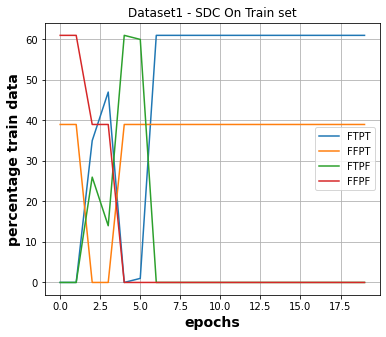

In [209]:
num  = 1
plt.figure(figsize=(6,5))
plt.plot(col1,np.array(col4)/num, label ="FTPT")
plt.plot(col1,np.array(col5)/num, label ="FFPT")
plt.plot(col1,np.array(col6)/num, label ="FTPF")
plt.plot(col1,np.array(col7)/num, label ="FFPF")
plt.title("Dataset1 - SDC On Train set")
plt.grid()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.xlabel("epochs", fontsize=14, fontweight = 'bold')
plt.ylabel("percentage train data", fontsize=14, fontweight = 'bold')
# plt.savefig(path+"_train.png", bbox_inches="tight")
# plt.savefig(path+"_train.pdf", bbox_inches="tight")
# plt.savefig(path+"_train.png", bbox_inches="tight")
# plt.savefig(path+"_train.pdf", bbox_inches="tight")
plt.show()

In [210]:
df_test

,epochs,argmax > 0.5,argmax < 0.5,focus_true_pred_true,focus_false_pred_true,focus_true_pred_false,focus_false_pred_false
0,0,0,1000,3,317,10,670
1,1,0,1000,357,0,323,320
2,2,0,1000,463,2,217,318
3,3,0,1000,0,320,680,0
4,4,0,1000,13,320,667,0
5,5,0,1000,680,320,0,0
6,6,510,490,680,320,0,0
7,7,680,320,680,320,0,0
8,8,680,320,680,320,0,0
9,9,680,320,680,320,0,0


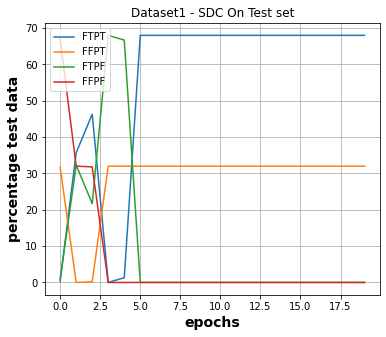

In [211]:
num = 10
plt.figure(figsize=(6,5))
plt.plot(col1,np.array(col10)/num, label ="FTPT")
plt.plot(col1,np.array(col11)/num, label ="FFPT")
plt.plot(col1,np.array(col12)/num, label ="FTPF")
plt.plot(col1,np.array(col13)/num, label ="FFPF")
plt.title("Dataset1 - SDC On Test set")
plt.grid()
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend()
plt.xlabel("epochs", fontsize=14, fontweight = 'bold')
plt.ylabel("percentage test data", fontsize=14, fontweight = 'bold')
# plt.savefig(path+"_test.png", bbox_inches="tight")
# plt.savefig(path+"_test.pdf", bbox_inches="tight")
# plt.savefig(path+"_test.png", bbox_inches="tight")
# plt.savefig(path+"_test.pdf", bbox_inches="tight")
plt.show()

In [212]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in train_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %f %%' % (
    100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %f %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %f %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %f %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %f %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half ==================> ",argmax_more_than_half)
print("argmax_less_than_half ==================> ",argmax_less_than_half)

Accuracy of the network on the train images: 100.000000 %
total correct 100
total train set images 100
focus_true_pred_true 61 =============> FTPT : 61.000000 %
focus_false_pred_true 39 =============> FFPT : 39.000000 %
focus_true_pred_false 0 =============> FTPF : 0.000000 %
focus_false_pred_false 0 =============> FFPF : 0.000000 %
argmax_more_than_half ==================>  61
argmax_less_than_half ==================>  39


In [213]:
correct = 0
total = 0
count = 0
flag = 1
focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels , fore_idx = inputs.to("cuda"),labels.to("cuda"), fore_idx.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    for j in range(labels.size(0)):
      focus = torch.argmax(alphas[j])
      if alphas[j][focus] >= 0.5 :
        argmax_more_than_half += 1
      else:
        argmax_less_than_half += 1

      if(focus == fore_idx[j] and predicted[j] == labels[j]):
          focus_true_pred_true += 1
      elif(focus != fore_idx[j] and predicted[j] == labels[j]):
        focus_false_pred_true += 1
      elif(focus == fore_idx[j] and predicted[j] != labels[j]):
        focus_true_pred_false += 1
      elif(focus != fore_idx[j] and predicted[j] != labels[j]):
        focus_false_pred_false += 1

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % (
    100 * correct / total))
print("total correct", correct)
print("total train set images", total)

print("focus_true_pred_true %d =============> FTPT : %f %%" % (focus_true_pred_true , (100 * focus_true_pred_true / total) ) )
print("focus_false_pred_true %d =============> FFPT : %f %%" % (focus_false_pred_true, (100 * focus_false_pred_true / total) ) )
print("focus_true_pred_false %d =============> FTPF : %f %%" %( focus_true_pred_false , ( 100 * focus_true_pred_false / total) ) )
print("focus_false_pred_false %d =============> FFPF : %f %%" % (focus_false_pred_false, ( 100 * focus_false_pred_false / total) ) )

print("argmax_more_than_half ==================> ",argmax_more_than_half)
print("argmax_less_than_half ==================> ",argmax_less_than_half)

Accuracy of the network on the test images: 100.000000 %
total correct 1000
total train set images 1000
focus_true_pred_true 680 =============> FTPT : 68.000000 %
focus_false_pred_true 320 =============> FFPT : 32.000000 %
focus_true_pred_false 0 =============> FTPF : 0.000000 %
focus_false_pred_false 0 =============> FFPF : 0.000000 %
argmax_more_than_half ==================>  680
argmax_less_than_half ==================>  320


In [214]:
correct = 0
total = 0

with torch.no_grad():
  for data in train_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels = inputs.to("cuda"), labels.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the train images: %f %%' % ( 100 * correct / total))
print("total correct", correct)
print("total train set images", total)

Accuracy of the network on the train images: 100.000000 %
total correct 100
total train set images 100


In [215]:
correct = 0
total = 0

with torch.no_grad():
  for data in test_loader:
    inputs, labels , fore_idx = data
    inputs = inputs.double()
    #inputs, labels = inputs.to("cuda"), labels.to("cuda")
    alphas, avg_images = focus_net(inputs)
    outputs = classify(avg_images)

    _, predicted = torch.max(outputs.data, 1)

    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %f %%' % ( 100 * correct / total))
print("total correct", correct)
print("total test set images", total)

Accuracy of the network on the test images: 100.000000 %
total correct 1000
total test set images 1000


In [216]:
for p in focus_net.parameters():
    print(p)

Parameter containing:
tensor([[ 3.4920,  3.1817, -2.1583, -0.4648,  0.1727]], dtype=torch.float64,
       requires_grad=True)


In [217]:
for p in classify.parameters():
    print(p)

Parameter containing:
tensor([[ 4.3104, -1.8626,  3.0006, -0.1176,  2.2439],
        [-0.2154,  3.8821,  1.3196, -0.1373, -0.3821],
        [-2.4154, -3.5640, -1.7262, -0.8573,  0.0124]], dtype=torch.float64,
       requires_grad=True)
Parameter containing:
tensor([-2.8108, -0.6128,  1.1901], dtype=torch.float64, requires_grad=True)


In [218]:
np.random.seed(2)

y_test = np.concatenate((np.zeros(500),np.ones(500),np.ones(500)*2))
#y = np.random.randint(0,3,6000)
idx_t= []
for i in range(3):
    print(i,sum(y_test==i))
    idx_t.append(y_test==i)
x_test = np.zeros((1500,5))


np.random.seed(12)
x_test[idx_t[0],:] = np.random.multivariate_normal(mean = [1,0,0,0,0],
                                            cov=cov_mat,size=sum(idx_t[0]))
x_test[idx_t[1],:] =  np.random.multivariate_normal(mean = [0,1,0,0,0],
                                            cov=cov_mat,size=sum(idx_t[1]))
x_test[idx_t[2],:] = np.random.multivariate_normal(mean = [0,0,1,0,0],
                                            cov=cov_mat,size=sum(idx_t[2]))

0 500
1 500
2 500


In [219]:
x_test= (x_test - mean_x)/std_x

In [220]:
x_test = torch.tensor(x_test)
outputs = classify(x_test)
_, predicted = torch.max(outputs.data, 1)
print("Accuracy on True Data ", np.sum(predicted.numpy()  == y_test) /15,"%")

Accuracy on True Data  66.66666666666667 %
